Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 019
Code Title: | Emerging Technologies in CpE 2
2nd Semester | AY 2023-2024
<hr> | <hr>
**Activity**:|Assignment 5.2: Build and Apply Multilayer Perceptron**
<hr> | <hr>
**Name**         | Naga, Jamal
**Section** | CPE32S3
**Date Performed**: |March 25, 2024
**Date Submitted**: |March 26, 2024
**Instructor**: | Engr. Roman Richard
<hr> | <hr>




---



## Choose any dataset


*   Banknote Authentication
*   Lohweg,Volker. (2013). Banknote Authentication. UCI Machine Learning Repository. https://doi.org/10.24432/C55P57.


---






## Explain the problem you are trying to solve


* To predict whether a banknote is genuine or counterfeit based on the extracted features from its image. This problem is a binary classification type where the model aims to classify banknotes as either genuine or counterfeit based on their statistical properties.


---







In [1]:
# Imports the needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt

In [344]:
# Load the dataset without considering the first row as header
bn_auth = pd.read_csv('/content/data_banknote_authentication.csv')
print(bn_auth.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371 entries, 0 to 1370
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   3.6216    1371 non-null   float64
 1   8.6661    1371 non-null   float64
 2   -2.8073   1371 non-null   float64
 3   -0.44699  1371 non-null   float64
 4   0         1371 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB
None


**Observation**: Upon checking the dataset I noticed that the title of each columns are erased or missing.

## Preprocessing the data

In [345]:
# Copy the dataset and add header = None
bn_auth = pd.read_csv('/content/data_banknote_authentication.csv', header=None)

# Add header columns named with these 5 variables
bn_auth.columns = ["variance", "skewness", "curtosis", "entropy", "class"] + list(bn_auth.columns[5:])

# Display the updated DataFrame
print(bn_auth.head(20))

    variance  skewness  curtosis  entropy  class
0    3.62160    8.6661  -2.80730 -0.44699      0
1    4.54590    8.1674  -2.45860 -1.46210      0
2    3.86600   -2.6383   1.92420  0.10645      0
3    3.45660    9.5228  -4.01120 -3.59440      0
4    0.32924   -4.4552   4.57180 -0.98880      0
5    4.36840    9.6718  -3.96060 -3.16250      0
6    3.59120    3.0129   0.72888  0.56421      0
7    2.09220   -6.8100   8.46360 -0.60216      0
8    3.20320    5.7588  -0.75345 -0.61251      0
9    1.53560    9.1772  -2.27180 -0.73535      0
10   1.22470    8.7779  -2.21350 -0.80647      0
11   3.98990   -2.7066   2.39460  0.86291      0
12   1.89930    7.6625   0.15394 -3.11080      0
13  -1.57680   10.8430   2.54620 -2.93620      0
14   3.40400    8.7261  -2.99150 -0.57242      0
15   4.67650   -3.3895   3.48960  1.47710      0
16   2.67190    3.0646   0.37158  0.58619      0
17   0.80355    2.8473   4.34390  0.60170      0
18   1.44790   -4.8794   8.34280 -2.10860      0
19   5.24230   11.02

**Observation:** I set the header as None and I added 5 header titles such as variance, skewness, curtosis, entropy, and class.

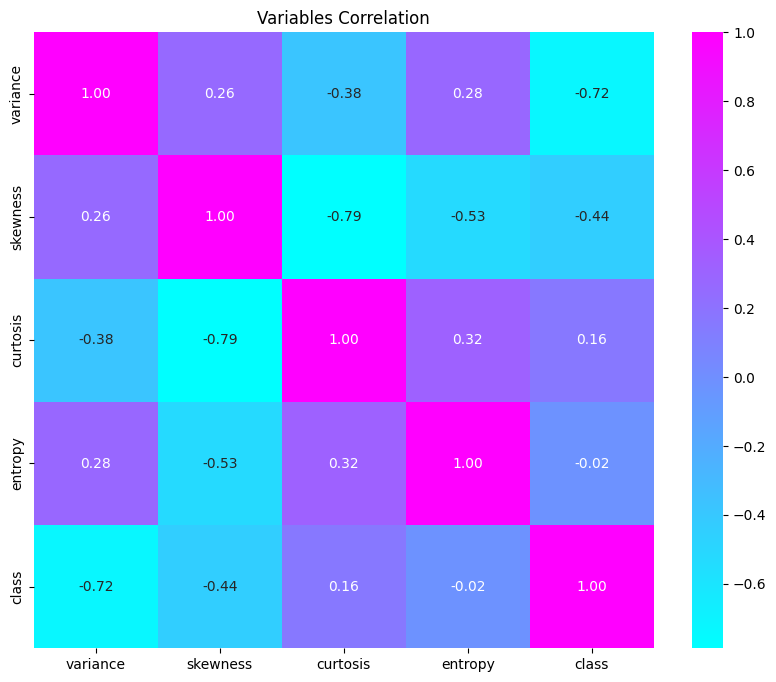

In [346]:
# Calculate the correlation matrix
correlation_matrix = bn_auth.corr()

# Plot the correlation matrix using Seaborn's heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='cool', fmt=".2f")
plt.title('Variables Correlation')
plt.show()

**Observation:** Upon searching for training a multilayer perceptron network, we would typically need a dataset that is linearly separable since perceptrons are only capable of learning linear decision boundaries. The correlation between the variables in the provided dataset appears to be non-linear, as evidenced by the low correlation values.

In [347]:
# Select independent and dependent variable
X = bn_auth.drop(['class'], axis=1)
y = bn_auth['class']

In [348]:
# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [198]:
X_train.shape

(877, 4)

## Create your own model

In [349]:
# Create a sequential model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=4, input_dim=4),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [350]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy',  metrics=['accuracy'])

## Evaluate the accuracy of your model

In [351]:
# Model Training
model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Model Evaluation
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
21/21 [==============================] - 1s 11ms/step - loss: 2.0011 - accuracy: 0.4405 - val_loss: 1.7232 - val_accuracy: 0.5069
Epoch 2/10
21/21 [==============================] - 0s 5ms/step - loss: 1.3596 - accuracy: 0.5342 - val_loss: 1.0948 - val_accuracy: 0.5556
Epoch 3/10
21/21 [==============================] - 0s 5ms/step - loss: 0.9032 - accuracy: 0.6220 - val_loss: 0.6155 - val_accuracy: 0.6736
Epoch 4/10
21/21 [==============================] - 0s 6ms/step - loss: 0.5690 - accuracy: 0.7158 - val_loss: 0.3680 - val_accuracy: 0.8785
Epoch 5/10
21/21 [==============================] - 0s 8ms/step - loss: 0.4307 - accuracy: 0.7946 - val_loss: 0.2929 - val_accuracy: 0.8958
Epoch 6/10
21/21 [==============================] - 0s 6ms/step - loss: 0.3579 - accuracy: 0.8467 - val_loss: 0.2489 - val_accuracy: 0.9062
Epoch 7/10
21/21 [==============================] - 0s 6ms/step - loss: 0.3199 - accuracy: 0.8690 - val_loss: 0.2187 - val_accuracy: 0.9201
Epoch 8/10
21/21 [=

**Observation**: After adjusting the neurons and dense layers, I achieved an accuracy of approximately 93% with a loss of 0.179. Additionally, I found that increasing the number of epochs resulted in further overfitting, so I settled on 10 training iterations.

## **Conclusion**

During this activity, I encountered difficulties in finding a dataset that would achieve at least 85% accuracy. Despite trying numerous datasets available on platforms like UCI and data.gov, I ultimately settled on the Banknote Authentication dataset sourced from https://archive.ics.uci.edu/dataset/267/banknote+authentication.

In this activity, I developed a multilayer perceptron with guidance from Nicholas Renotte's tutorial on YouTube. I utilized the Banknote Authentication dataset to predict whether a banknote is genuine or counterfeit based on features extracted from its image. I designated 'class' as the dependent variable (y) and the remaining features as independent variables (X). Subsequently, I split the data into train set (70%) and test set (30%). Employing three dense layers with ReLU and sigmoid activation functions, I fine-tuned the epoch parameters, resulting in a model accuracy of 93% with a test loss of 0.179.

However, as I achieved a high accuracy rate, I became concerned about potential overfitting. Consequently, I introduced a Validation Set to the model. This addition allowed for the tuning of hyperparameters and evaluation of the model's performance during training. By incorporating a Validation Set, I aimed to mitigate overfitting by providing an independent dataset for validating the model's performance on previously unseen data.

Through this activity, I gained insight into the significance of multilayer perceptrons as fundamental architectures in neural networks. Their versatility and effectiveness make them a prevalent choice in neural network applications.